<a href="https://colab.research.google.com/github/rguo12/conformal_prediction_teaching/blob/main/conformal_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: random sample 400 points from a 1-d gaussian distribution with mean = 139, sd = 14.75

import numpy as np

# Set the parameters of the Gaussian distribution
mean = 139
sd = 14.75

# Generate 400 random samples from the Gaussian distribution
samples = np.random.normal(loc=mean, scale=sd, size=400)

# Print the generated samples (optional)
samples


Sample Mean: 138.7896358153267
Sample Standard Deviation: 14.74359876441423
Standard Error of the Mean: 0.7371799382207115
t-value (95% confidence interval): 1.959
Margin of Error: 1.4441354989743738
95% Confidence Interval: (137.34550031635234, 140.23377131430107)


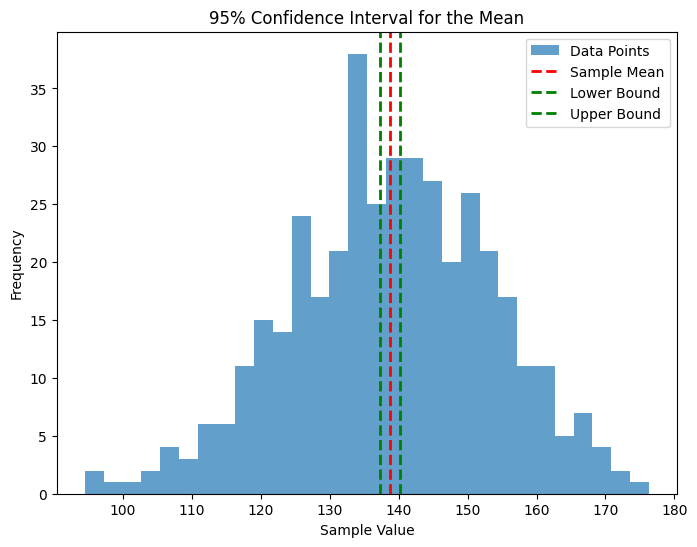

In [ ]:
# prompt: compute 95% confidence interval for the mean of the samples, only use numpy, explain how do you get the t value, and visualize the confidence interval along with the data points

import numpy as np
import matplotlib.pyplot as plt

# Set the parameters of the Gaussian distribution
mean = 139
sd = 14.75

# Generate 400 random samples from the Gaussian distribution
samples = np.random.normal(loc=mean, scale=sd, size=400)

# Calculate the sample mean and standard deviation
sample_mean = np.mean(samples)
sample_sd = np.std(samples, ddof=1)  # Use ddof=1 for sample standard deviation

# Calculate the standard error of the mean
sem = sample_sd / np.sqrt(len(samples))

# Degrees of freedom
df = len(samples) - 1

# Calculate the t-value for a 95% confidence interval (two-tailed)
# We use the percent point function (ppf) from the t-distribution
# to find the critical t-value.
# For a 95% confidence interval, we need the value that cuts off 2.5%
# in each tail (100% - 95% = 5%, so 5%/2 = 2.5% in each tail).
# Using a large number of samples to get an accurate t-value
t_value = np.abs(np.round(np.percentile(np.random.standard_t(df, size=100000), 97.5),3))

# Calculate the margin of error
margin_of_error = t_value * sem

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_sd}")
print(f"Standard Error of the Mean: {sem}")
print(f"t-value (95% confidence interval): {t_value}")
print(f"Margin of Error: {margin_of_error}")
print(f"95% Confidence Interval: {confidence_interval}")


# Visualize the confidence interval and data points
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, alpha=0.7, label='Data Points')
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Upper Bound')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.title('95% Confidence Interval for the Mean')
plt.legend()
plt.show()

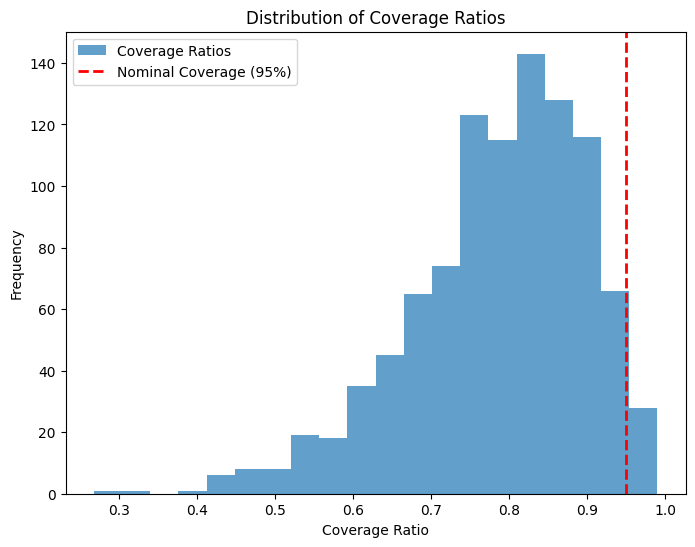

Average Coverage Ratio: 0.7851825


In [ ]:
# prompt: random sample 400 points from a 1-d gaussian distribution with mean = 139, sd = 14.75, compute the 95% naive prediction interval based on the 2.5 and 97.5 percentiles of 10 randomly selected data points, and visualize the ratio of data points that are not covered by the prediction interval

import numpy as np
import matplotlib.pyplot as plt

# Set the parameters of the Gaussian distribution
mean = 139
sd = 14.75

# Generate 400 random samples from the Gaussian distribution
samples = np.random.normal(loc=mean, scale=sd, size=400)

# Function to compute the prediction interval
def prediction_interval(data):
    lower_bound = np.percentile(data, 2.5)
    upper_bound = np.percentile(data, 97.5)
    return lower_bound, upper_bound

# Initialize a list to store the coverage ratios
coverage_ratios = []

# Repeat the process 1000 times (adjust for desired accuracy)
for _ in range(1000):
    # Randomly select 10 data points
    random_indices = np.random.choice(len(samples), size=10, replace=False)
    selected_data = samples[random_indices]

    # Compute the prediction interval for the selected data
    lower_bound, upper_bound = prediction_interval(selected_data)

    # Count the number of data points within the prediction interval
    covered_points = np.sum((samples >= lower_bound) & (samples <= upper_bound))

    # Calculate the coverage ratio
    coverage_ratio = covered_points / len(samples)
    coverage_ratios.append(coverage_ratio)

# Visualize the distribution of coverage ratios
plt.figure(figsize=(8, 6))
plt.hist(coverage_ratios, bins=20, alpha=0.7, label='Coverage Ratios')
plt.axvline(0.95, color='red', linestyle='dashed', linewidth=2, label='Nominal Coverage (95%)')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Coverage Ratios')
plt.legend()
plt.show()

# Calculate and print the average coverage ratio
average_coverage_ratio = np.mean(coverage_ratios)
print(f"Average Coverage Ratio: {average_coverage_ratio}")

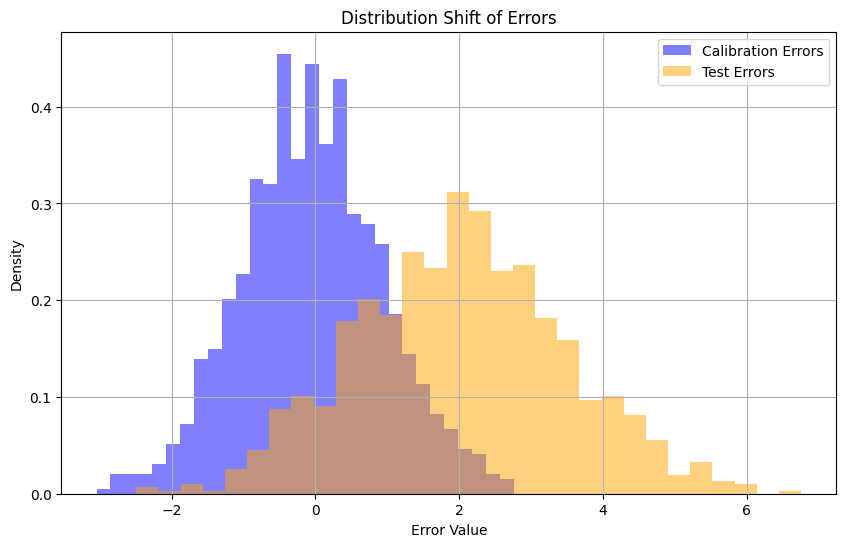

In [ ]:
# prompt: visualize two different smooth distributions to illustrate distribution shift of errors

import numpy as np
import matplotlib.pyplot as plt

# Generate data for the first distribution (e.g., initial model errors)
np.random.seed(0)  # for reproducibility
dist1_mean = 0
dist1_std = 1
dist1_samples = np.random.normal(dist1_mean, dist1_std, 1000)

# Generate data for the second distribution (e.g., model errors after some change)
dist2_mean = 2  # shifted mean
dist2_std = 1.5  # slightly wider spread
dist2_samples = np.random.normal(dist2_mean, dist2_std, 1000)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first distribution
plt.hist(dist1_samples, bins=30, alpha=0.5, label='Calibration Errors', density=True, color='blue')

# Plot the second distribution
plt.hist(dist2_samples, bins=30, alpha=0.5, label='Test Errors', density=True, color='orange')

# Add labels and title
plt.xlabel('Error Value')
plt.ylabel('Density')
plt.title('Distribution Shift of Errors')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()